<a href="https://colab.research.google.com/github/R3gm/Colab-resources/blob/main/Image_Super_Resolution_latent_upscaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Resolution with latentupscaler

| Description | Link |
| ----------- | ---- |
| 🚀 Online inference | [![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/Manjushri/SD-2X-And-4X-CPU) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/Colab-resources/) |



- [sd-x2-latent-upscaler](https://huggingface.co/stabilityai/sd-x2-latent-upscaler)

It enhances image resolution by 2x in the same latent space as the Stable Diffusion model. Use it with Stable Diffusion's denoised image embeddings. It supports text-to-image pipelines and works on all Stable Diffusion checkpoints.


- [stable-diffusion-x4-upscaler](https://huggingface.co/stabilityai/stable-diffusion-x4-upscaler)

It generates high-resolution images based on text prompts and a noise_level parameter. The model was trained on LAION images and uses OpenCLIP-ViT/H text encoder

In [ ]:
!pip install -q diffusers transformers accelerate bitsandbytes xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 6.3 MB/s eta 0:00:00


In [ ]:
#@title Setup
from diffusers import StableDiffusionLatentUpscalePipeline, StableDiffusionPipeline, StableDiffusionUpscalePipeline
from google.colab import files
import torch
import requests
from PIL import Image
from io import BytesIO
import gc
import matplotlib.pyplot as plt

Saving 813-oXWaWvL.png to 813-oXWaWvL (1).png
Original image


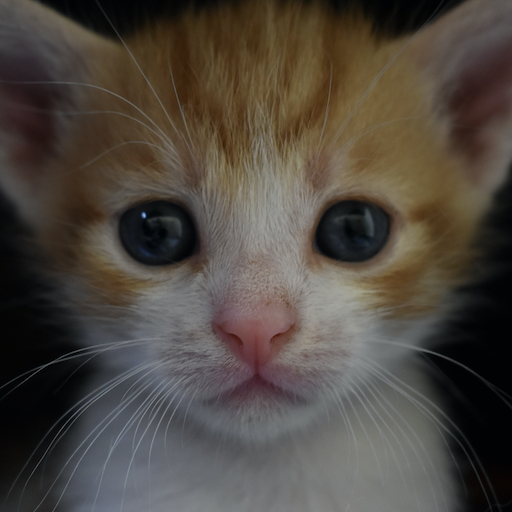

In [ ]:
#@title Upload an image

# File
uploaded = files.upload()
image_path = next(iter(uploaded))
image_content = uploaded[image_path]

# Preproc... and show
image = Image.open(BytesIO(image_content)).convert("RGB")
#image = image.resize((128, 128))
print('Original image')
image.show()

  0%|          | 0/20 [00:00<?, ?it/s]

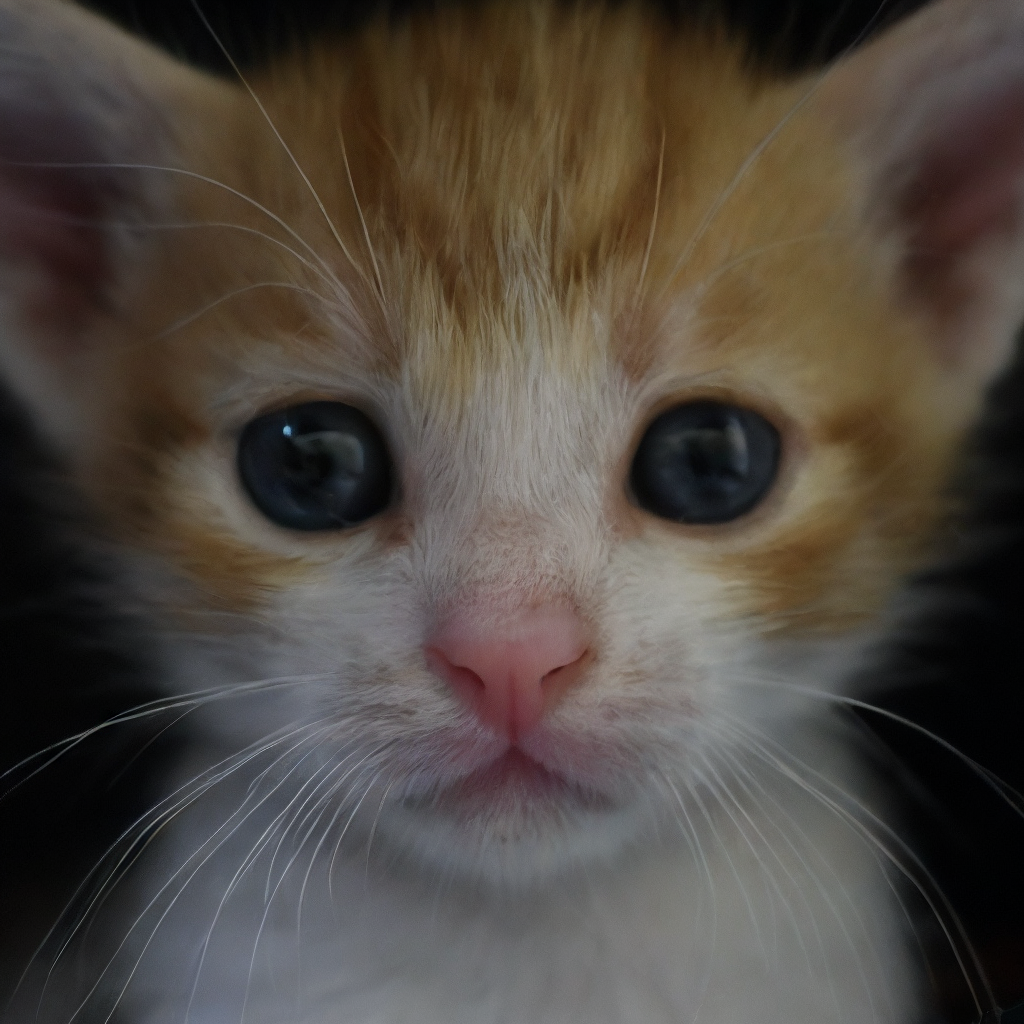

In [ ]:
# Conf
MODEL_ID = "stabilityai/sd-x2-latent-upscaler" #@param ["stabilityai/stable-diffusion-x4-upscaler", "stabilityai/sd-x2-latent-upscaler"] 
PROMPT = "" #@param {type:"string"}

NUM_INFERENCE_STEPS = 20 #@param {type:"integer"}
GUIDANCE_SCALE = 0 #@param {type:"integer"}
#@markdown
ENABLE_MANUAL_SEED = False #@param {type:'boolean'}
MANUAL_SEED = 33 #@param {type:"integer"}
generator = torch.manual_seed(MANUAL_SEED) if ENABLE_MANUAL_SEED else None


# Select model conf
if MODEL_ID == "stabilityai/stable-diffusion-x4-upscaler":
  pipeline = StableDiffusionUpscalePipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16).to("cuda")
  image = image.resize((128, 128)) # memory
  
else:
  pipeline = StableDiffusionLatentUpscalePipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16).to("cuda")

# Upscaler
upscaled_image = pipeline(
  prompt=PROMPT,
  image=image,
  num_inference_steps=NUM_INFERENCE_STEPS,
  guidance_scale=GUIDANCE_SCALE,
  generator=generator, 
).images[0]

torch.cuda.empty_cache()
gc.collect()

upscaled_image.show()
upscaled_image.save("upscale.png")

In [ ]:
#@title Download result

files.download('upscale.png')

In [ ]:
#@title Compare the results
#  Compare
fig, axs = plt.subplots(1, 2)

axs[0].imshow(image)
axs[0].axis('off')

axs[1].imshow(upscaled_image)
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image.size + (len(image.getbands()),)

(512, 512, 3)

In [ ]:
upscaled_image.size + (len(upscaled_image.getbands()),)

(1024, 1024, 3)